In [1]:
import pandas as pd
import numpy as np
#estandarizacion de variables
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
#graficas
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from pylab import rcParams

#modelo
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import math
import itertools

In [2]:
df_ = pd.read_excel("PBI.xlsx")
df_

,Unnamed: 0,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Variación de existencias (3),Discrepancia estadística (4),Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,1993-01,152148,28507,15396,37325,0,3083,20089,216370
1,1993-04,166026,32816,17483,43956,0,1549,19958,241872
2,1993-07,166668,33440,16427,48221,0,1006,23116,242646
3,1993-10,169860,33048,16058,50776,0,338,24947,245132
4,1994-01,164965,29309,16281,45580,0,3935,27125,232945
...,...,...,...,...,...,...,...,...,...
107,2019-10,450453,99383,172100,110590,12945,-20040,152098,672442
108,2020-01,471875,90957,137243,93562,-20185,-719,141762,630971
109,2020-04,415986,88041,136695,76225,-5772,15272,118578,607869
110,2020-07,408462,90647,136420,115500,2524,-930,137828,614795


In [3]:
df = df_.iloc[45:, :]
df.reset_index(inplace = True, drop=True)


In [4]:
df

,Unnamed: 0,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Variación de existencias (3),Discrepancia estadística (4),Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,2004-04,338800,52072,119462,81995,2072,0,80006,514396
1,2004-07,310441,53721,119619,79254,3533,0,85416,481152
2,2004-10,293850,60195,120898,75368,22608,0,88375,484544
3,2005-01,319800,54179,119187,80672,4669,0,84905,493603
4,2005-04,385778,58212,138218,94508,2240,0,97288,581668
...,...,...,...,...,...,...,...,...,...
62,2019-10,450453,99383,172100,110590,12945,-20040,152098,672442
63,2020-01,471875,90957,137243,93562,-20185,-719,141762,630971
64,2020-04,415986,88041,136695,76225,-5772,15272,118578,607869
65,2020-07,408462,90647,136420,115500,2524,-930,137828,614795


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Unnamed: 0                                     67 non-null     object
 1   Consumo privado                                67 non-null     int64 
 2   Consumo público                                67 non-null     int64 
 3   Exportaciones FOB (bienes y servicios reales)  67 non-null     int64 
 4   Formación bruta de capital fijo                67 non-null     int64 
 5   Variación de existencias (3)                   67 non-null     int64 
 6   Discrepancia estadística (4)                   67 non-null     int64 
 7   Importaciones FOB (bienes y servicios reales)  67 non-null     int64 
 8   Producto Interno Bruto                         67 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 4.8+ KB


In [6]:
df.rename(columns = {"Unnamed: 0" : "Año/Trimestre"}, inplace=True)
df.columns

C:\Users\leona\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['Año/Trimestre', 'Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo', 'Variación de existencias (3)',
       'Discrepancia estadística (4)',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'],
      dtype='object')

In [7]:
df["Año/Trimestre"] =  pd.to_datetime(df["Año/Trimestre"])

<ipython-input-7-b94b48569be0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Año/Trimestre"] =  pd.to_datetime(df["Año/Trimestre"])


In [8]:
eliminados = ["Variación de existencias (3)", "Discrepancia estadística (4)"]
df.drop(eliminados, axis=1, inplace=True)
df

C:\Users\leona\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Año/Trimestre,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,2004-04-01,338800,52072,119462,81995,80006,514396
1,2004-07-01,310441,53721,119619,79254,85416,481152
2,2004-10-01,293850,60195,120898,75368,88375,484544
3,2005-01-01,319800,54179,119187,80672,84905,493603
4,2005-04-01,385778,58212,138218,94508,97288,581668
...,...,...,...,...,...,...,...
62,2019-10-01,450453,99383,172100,110590,152098,672442
63,2020-01-01,471875,90957,137243,93562,141762,630971
64,2020-04-01,415986,88041,136695,76225,118578,607869
65,2020-07-01,408462,90647,136420,115500,137828,614795


In [9]:
scaler = StandardScaler()
df1= scaler.fit_transform(df.drop("Año/Trimestre", axis=1))
df_std = pd.DataFrame(df1, columns = ['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'])
df_std

,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,-1.704742,-2.010411,-1.635699,-1.904875,-1.941581,-1.937947
1,-2.101317,-1.898569,-1.625333,-2.023825,-1.804860,-2.384342
2,-2.333326,-1.459473,-1.540883,-2.192465,-1.730080,-2.338795
3,-1.970440,-1.867505,-1.653857,-1.962289,-1.817774,-2.217152
4,-1.047799,-1.593969,-0.397272,-1.361852,-1.504830,-1.034631
...,...,...,...,...,...,...
62,-0.143379,1.198435,1.839900,-0.663946,-0.119668,0.184265
63,0.156188,0.626946,-0.461649,-1.402905,-0.380880,-0.372600
64,-0.625368,0.429169,-0.497833,-2.155274,-0.966788,-0.682809
65,-0.730584,0.605920,-0.515991,-0.450868,-0.480301,-0.589808


In [10]:
df_std.insert(0, "Año/Trimestre", df["Año/Trimestre"].values, allow_duplicates = False)
df_std

,Año/Trimestre,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,2004-04-01,-1.704742,-2.010411,-1.635699,-1.904875,-1.941581,-1.937947
1,2004-07-01,-2.101317,-1.898569,-1.625333,-2.023825,-1.804860,-2.384342
2,2004-10-01,-2.333326,-1.459473,-1.540883,-2.192465,-1.730080,-2.338795
3,2005-01-01,-1.970440,-1.867505,-1.653857,-1.962289,-1.817774,-2.217152
4,2005-04-01,-1.047799,-1.593969,-0.397272,-1.361852,-1.504830,-1.034631
...,...,...,...,...,...,...,...
62,2019-10-01,-0.143379,1.198435,1.839900,-0.663946,-0.119668,0.184265
63,2020-01-01,0.156188,0.626946,-0.461649,-1.402905,-0.380880,-0.372600
64,2020-04-01,-0.625368,0.429169,-0.497833,-2.155274,-0.966788,-0.682809
65,2020-07-01,-0.730584,0.605920,-0.515991,-0.450868,-0.480301,-0.589808


# METODOLOGIA BOX JENKINS 

## Analisis gráfico de estacionariedad:

In [11]:
producto = df["Producto Interno Bruto"]

<Figure size 36000x7200 with 0 Axes>

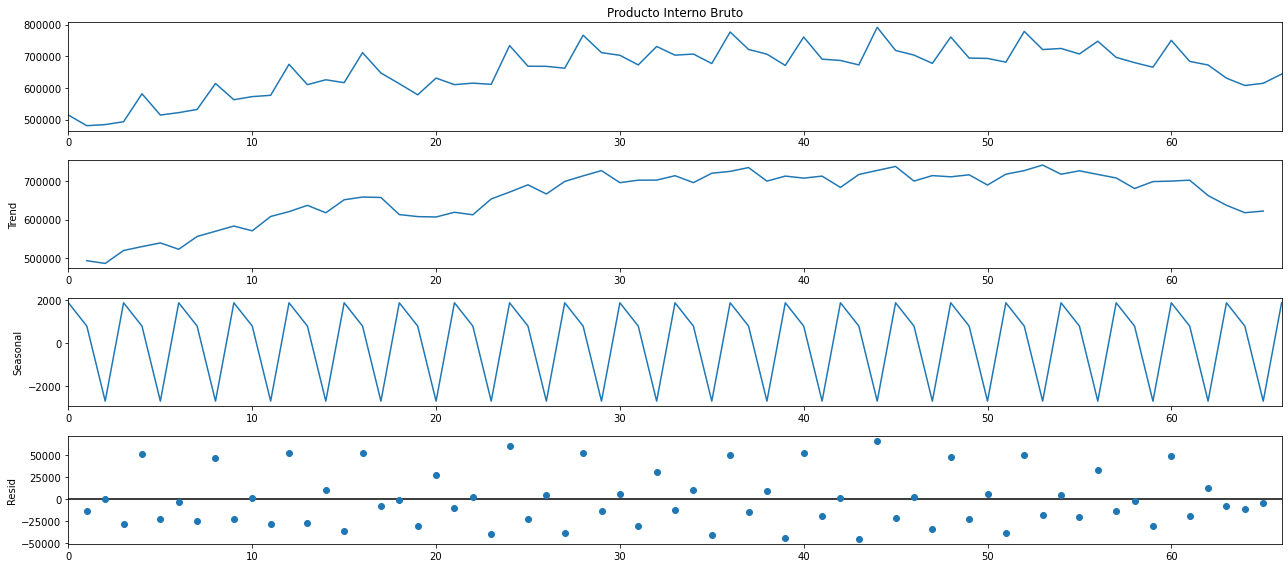

In [12]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(500,100))
decomposition = sm.tsa.seasonal_decompose(producto, model='additive',period=3)

#seasonal decompose : descompones la serie en 4 para ver graficamente si hay una estacionalidad
fig = decomposition.plot()
plt.savefig("SERIE2.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

Se observa claramente que la serie no es estacionaria, no gravita alrededor de una media ni su varianza es constante

## 1) Análisis Teórico de estacionariedad:
## Test ADF

In [13]:
#Aplico logaritmo para evitar la alta variabilidad de la serie 
producto_log = np.log(producto)

#Armo un dataframe aparte con los valores del producto en logaritmo
df_log = pd.DataFrame(producto_log)
df_log

,Producto Interno Bruto
0,13.150749
1,13.083939
2,13.090964
3,13.109487
4,13.273655
...,...
62,13.418671
63,13.355015
64,13.317715
65,13.329044


In [14]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log["Producto Interno Bruto"], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)
    

Estadistico:  -2.121129580940795
p-valor:  0.2361036026175118
Valores críticos
1% -3.548493559596539
5% -2.912836594776334
10% -2.594129155766944


La serie no es estacionaria.



<AxesSubplot:>

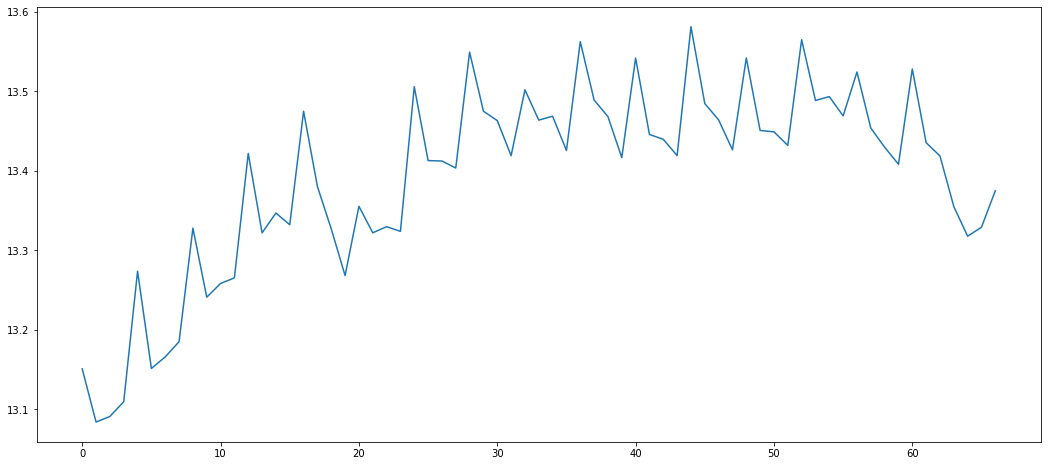

In [15]:
df_log["Producto Interno Bruto"].plot()

## Diferenciamos una vez


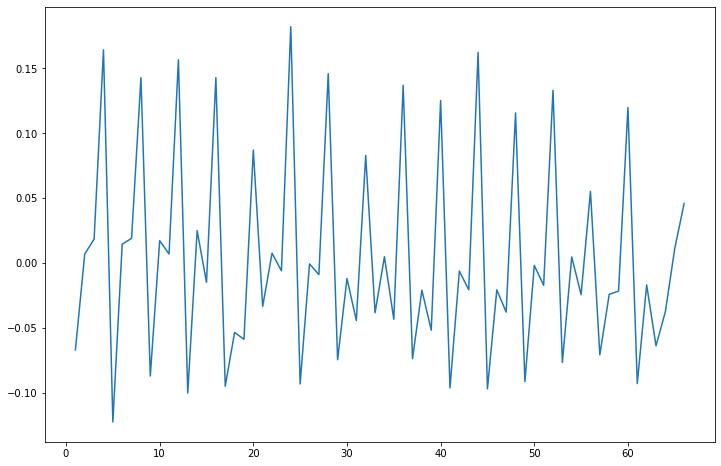

In [16]:
producto_diff1 = df_log["Producto Interno Bruto"] - df_log["Producto Interno Bruto"].shift(1)
producto_diff1.dropna().plot(figsize=(12,8))
plt.savefig("SERIEdiferenciada.png",format  ="png", dpi = 100, bbox_inches='tight')

In [17]:
#Hacemos Test ADF de la diferencia del producto para chequear si pudiimos corregir la estacionariedad


resultado = adfuller(producto_diff1.dropna(), maxlag = 12) 
#maxlag = 12 porque tenemos una muestra de tamaño 67



print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)
    

Estadistico:  -1.9906782803948544
p-valor:  0.2906752462208533
Valores críticos
1% -3.548493559596539
5% -2.912836594776334
10% -2.594129155766944


Todavia sigue siendo no estacionaria, vamos a probar ahora incluyendo tendencia a los parametros de la regresion auxiliar del test y vemos si se corrige.

In [18]:
#Hacemos Test ADF agregando tendencia y constante al modelo a ver si podemos lograr que sea estacionaria la serie

resultado = adfuller(producto_diff1.dropna(), maxlag = 12,regression = "ct") 
#maxlag = 12 porque tenemos una muestra de tamaño 67
#regression = "ct"porque tenemos intercepto y observamos tendencia



print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -3.912711665413764
p-valor:  0.011653325719157797
Valores críticos
1% -4.133575845229151
5% -3.4935752832456797
10% -3.1754929451540197


La serie es estacionaria. Podemos continuar con el analisis.

## 2) Identificación de Modelo a Aplicar

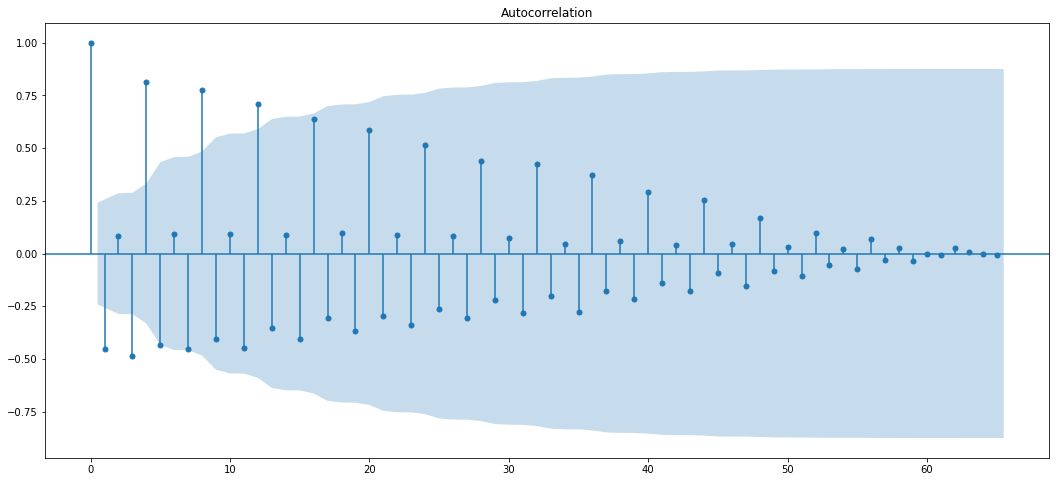

In [19]:
# La funcion de autocorrelacion decrece exponencialmente con lo cual es muy probable que estemos frente a un modelo AR(p)
#con p =5 

#ATUROCORRELACION
sm.graphics.tsa.plot_acf(producto_diff1.dropna(), lags=65)
plt.savefig("Auotcorrelacion.png",format  ="png", dpi = 100, bbox_inches='tight')

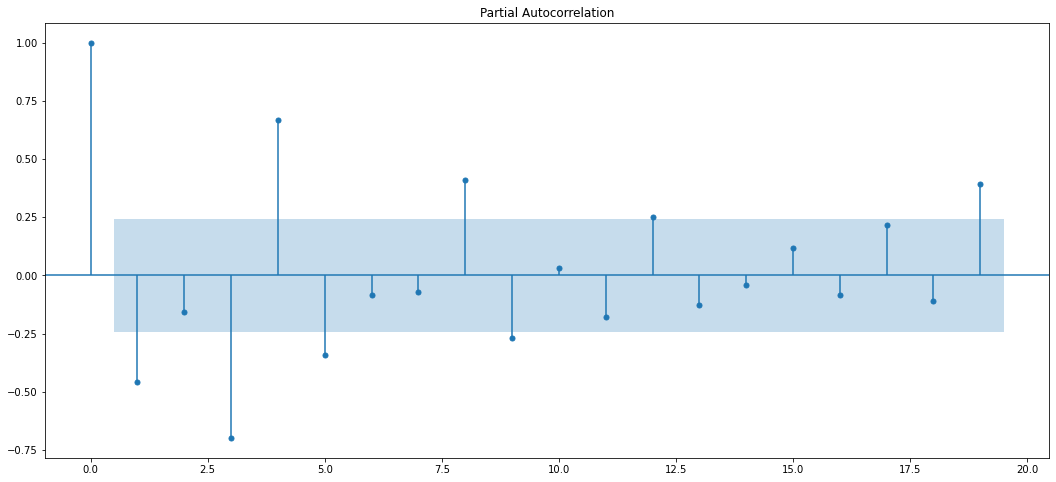

In [20]:
#AUTOCORRELACION PARCIAL
sm.graphics.tsa.plot_pacf(producto_diff1.dropna())
plt.savefig("Autocorrelacion Parcial.png",format  ="png", dpi = 100, bbox_inches='tight')

## 3) Estimación

In [21]:
#p = d = q = range(0, 10)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, d, q))]

In [22]:
#bests = {}
#for param in pdq:
    #for param_seasonal in seasonal_pdq:
        #try:
            #mod = sm.tsa.statespace.SARIMAX(producto_diff1.dropna(), 
                                            #order=param, 
                                            #seasonal_order=param_seasonal, 
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)
            #results = mod.fit()
            #ind = (param, param_seasonal)
            #bests[ind] = results.aic
        #except Exception as e:
            #print(type(e), e)
            #continue

In [23]:
#print(min(bests.items(), key=lambda x: x[1]))

Estimacion del modelo

In [24]:
mod = sm.tsa.statespace.SARIMAX(producto_log[:-1],
                                order = (7,1,0),
                                trend=('ct'), #tendencia e intercepto de la serie
                            seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

                                 SARIMAX Results                                  
Dep. Variable:     Producto Interno Bruto   No. Observations:                   66
Model:                   SARIMAX(7, 1, 0)   Log Likelihood                 114.658
Date:                    Sat, 10 Jul 2021   AIC                           -209.316
Time:                            12:07:20   BIC                           -188.711
Sample:                                 0   HQIC                          -201.290
                                     - 66                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0620      0.018      3.532      0.000       0.028       0.096
drift         -0.0014      0.000     -3.569      0.000      -0.002      -0.001
ar.L1         -0.307

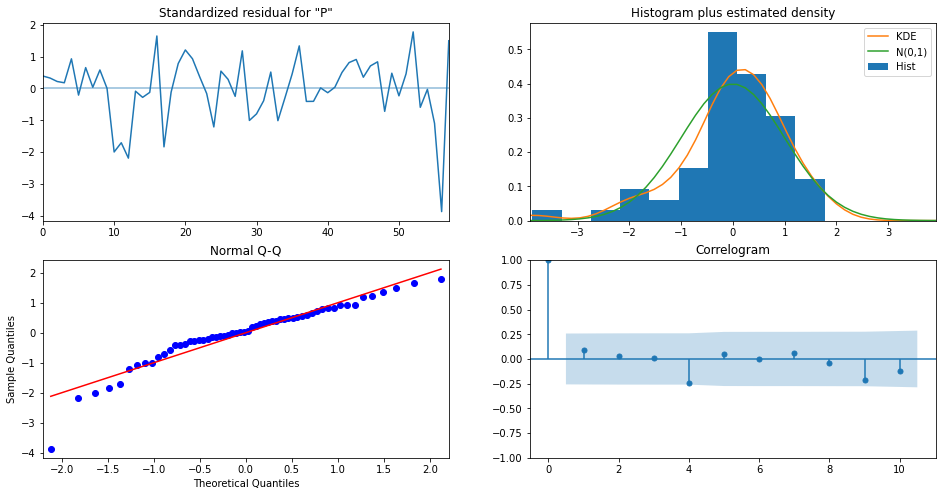

In [25]:
print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.savefig("Salida-PBI.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

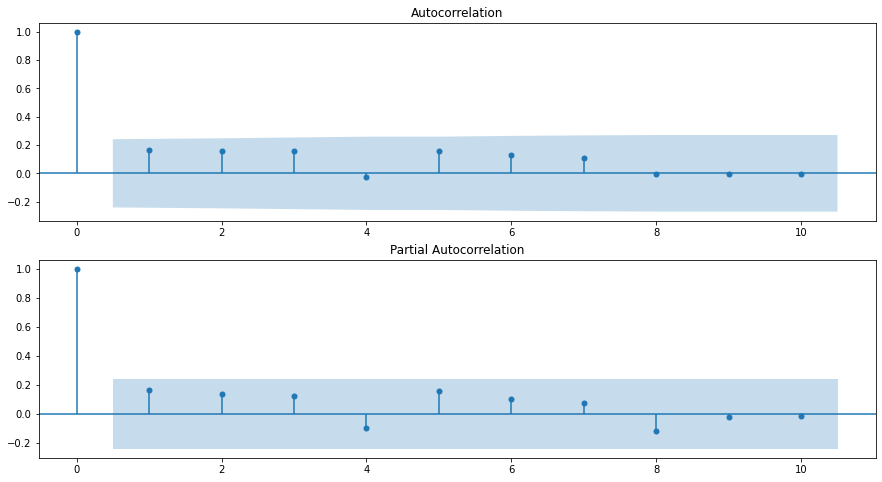

In [26]:
residuos = results.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(residuos, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuos, lags=10, ax=ax[1])
plt.show()

## Pronostico

In [27]:
pred = results.get_forecast(2)
pred.predicted_mean

66    13.327010
67    13.290432
Name: predicted_mean, dtype: float64

In [28]:
print(pred.summary_frame())

Producto Interno Bruto       mean   mean_se  mean_ci_lower  mean_ci_upper
66                      13.327010  0.033561      13.261230      13.392789
67                      13.290432  0.040828      13.210411      13.370454


In [29]:
serie_predicha = results.get_prediction().predicted_mean

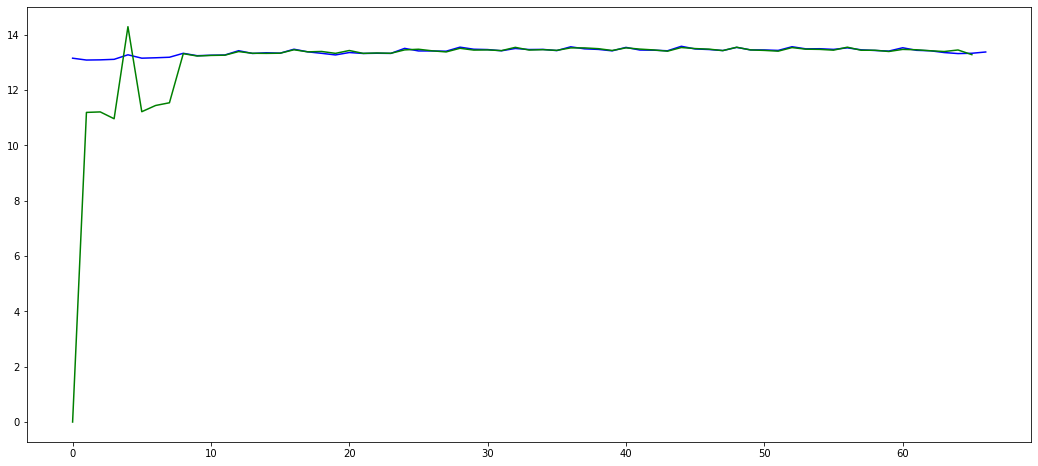

In [30]:
plt.plot(producto_log , color ="Blue") #Valor real
plt.plot(serie_predicha, color ="Green") #Predicción
plt.savefig("Resultado PBI vs real.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

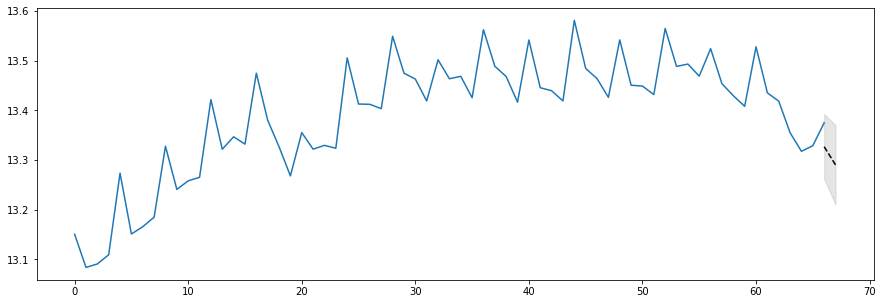

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
producto_log.plot(ax=ax)

# Construct the forecasts
fcst = pred.summary_frame()
fcst['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcst.index, fcst['mean_ci_lower'], fcst['mean_ci_upper'], color='k', alpha=0.1);

In [32]:
#ERROR CUADRADO MEDIO
#diferencia absoluta promedio entre la serie real y la predicha
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(producto_log[:-1], serie_predicha))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.720


In [33]:
#MAE: ERROR ABSOLUTO MEDIO
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(producto_log[:-1], serie_predicha)
print('MAE: %.3f' % mae)

MAE: 0.406


In [34]:
#ERROR EN PORCENTAJE DE LA MEDIA DE LOS ERRORES
def SMAPE (forecast, actual):
    """Returns the Symmetric Mean Absolute Percentage Error between two Series"""
    masked_arr = ~((forecast==0)&(actual==0))
    diff = abs(forecast[masked_arr] - actual[masked_arr])
    avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')
    return sum(diff/avg)/len(forecast) * 100

In [35]:
SMAPE(serie_predicha,producto_log[:-1])

SMAPE Error Score: 4.7 %


4.697203747620923